In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)


In [2]:
dataset = pd.read_csv("D:/A/miniproject3/datasets/final_cleaned_data.csv")
dataset.head()


,Date,Centre_Name,Commodity_Name,Price,Month
0,2008-10-15,BENGALURU,Brinjal,14.0,2008-10
1,2008-10-16,BENGALURU,Brinjal,14.0,2008-10
2,2008-10-17,BENGALURU,Brinjal,14.0,2008-10
3,2008-10-20,BENGALURU,Brinjal,14.0,2008-10
4,2008-10-21,BENGALURU,Brinjal,14.0,2008-10


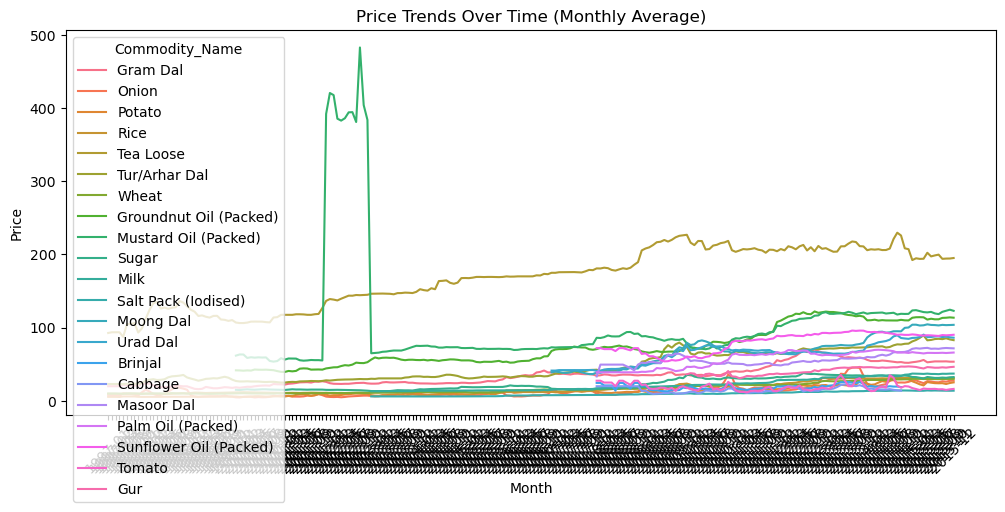

In [3]:
# Ensure Date is datetime type
dataset["Date"] = pd.to_datetime(dataset["Date"])

# Resample to monthly average price
df_resampled = dataset.groupby(["Month", "Commodity_Name"]).agg({"Price": "mean"}).reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_resampled, x="Month", y="Price", hue="Commodity_Name")
plt.title("Price Trends Over Time (Monthly Average)")
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

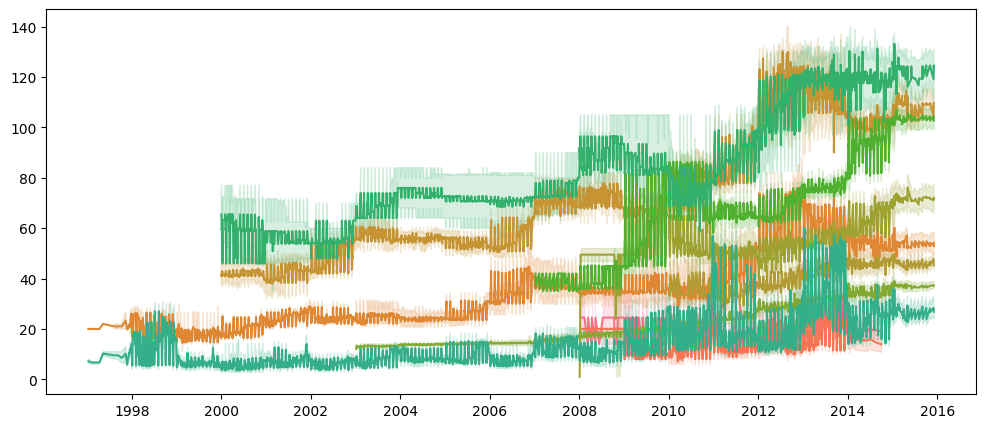

In [ ]:
# Remove extreme outliers (above 95th percentile)
price_threshold = dataset["Price"].quantile(0.95)
filtered_df = dataset[dataset["Price"] <= price_threshold]

plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_df, x="Date", y="Price", hue="Commodity_Name")
plt.title("Price Trends Without Outliers")
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

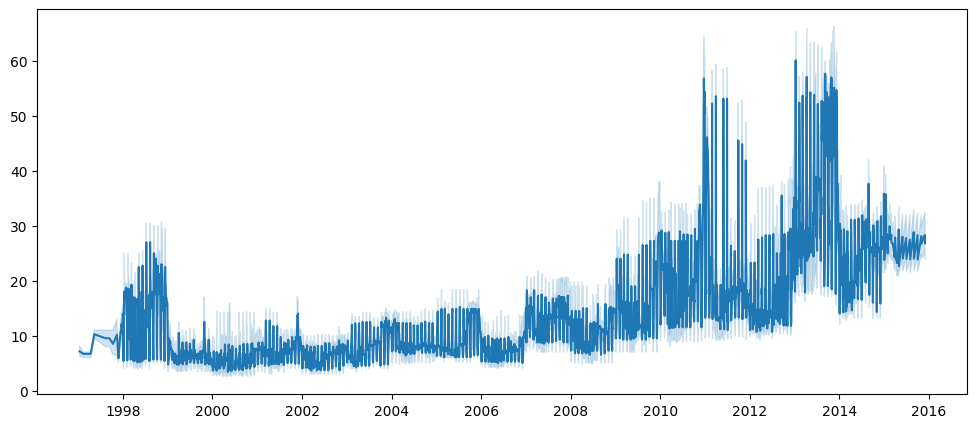

In [ ]:
top_commodities = dataset["Commodity_Name"].value_counts().head(5).index
filtered_df = dataset[dataset["Commodity_Name"].isin(top_commodities)]

plt.figure(figsize=(12, 5))
sns.lineplot(data=filtered_df, x="Date", y="Price", hue="Commodity_Name")
plt.title("Price Trends for Top 5 Commodities")
plt.xticks(rotation=45)
plt.show()
